In [45]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import glob
from pydub import AudioSegment
import librosa
import librosa.display

In [3]:
df = pd.read_csv('data/speakers_all.csv')

In [4]:
df.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,24.0,12.0,"koussi, senegal",balanta,balanta,male,788,senegal,True,NaN,NaN,NaN
1,18.0,10.0,"buea, cameroon",cameroon,cameroon,male,1953,cameroon,True,NaN,NaN,NaN
2,48.0,8.0,"hong, adamawa, nigeria",fulfulde,fulfulde,male,1037,nigeria,True,NaN,NaN,NaN
3,42.0,42.0,"port-au-prince, haiti",haitian,haitian,male,1165,haiti,True,NaN,NaN,NaN
4,40.0,35.0,"port-au-prince, haiti",haitian,haitian,male,1166,haiti,True,NaN,NaN,NaN


# Visualization

<AxesSubplot:xlabel='file_missing?', ylabel='count'>

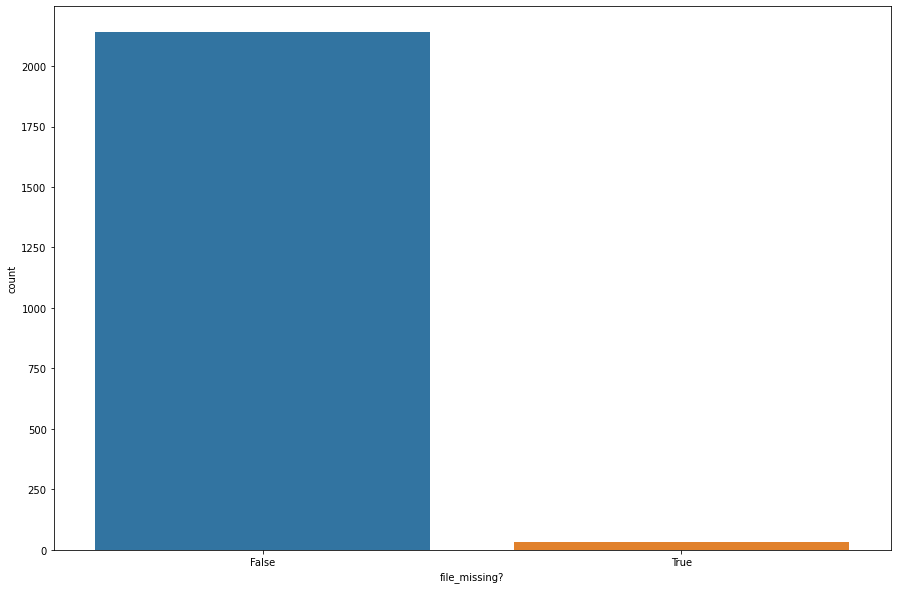

In [6]:
# File missing quite big
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='file_missing?')

In [19]:
sel_df = df[~df['file_missing?']].copy()
sel_df['sex'] = sel_df['sex'].apply(lambda x: 'female' if x == 'famale' else x)

<AxesSubplot:xlabel='sex', ylabel='count'>

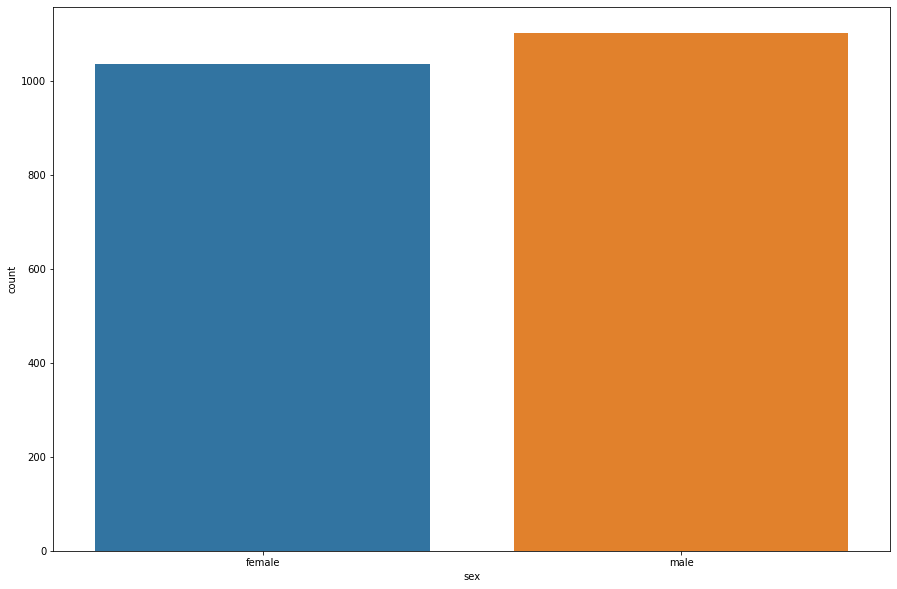

In [20]:
plt.figure(figsize=(15, 10))
sns.countplot(data=sel_df, x='sex')

<AxesSubplot:xlabel='age', ylabel='Count'>

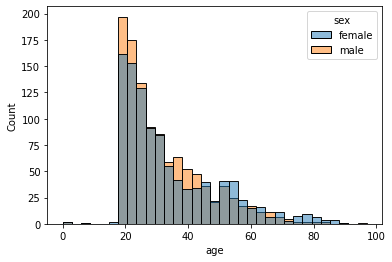

In [34]:
sns.histplot(data=sel_df, x='age', hue='sex')

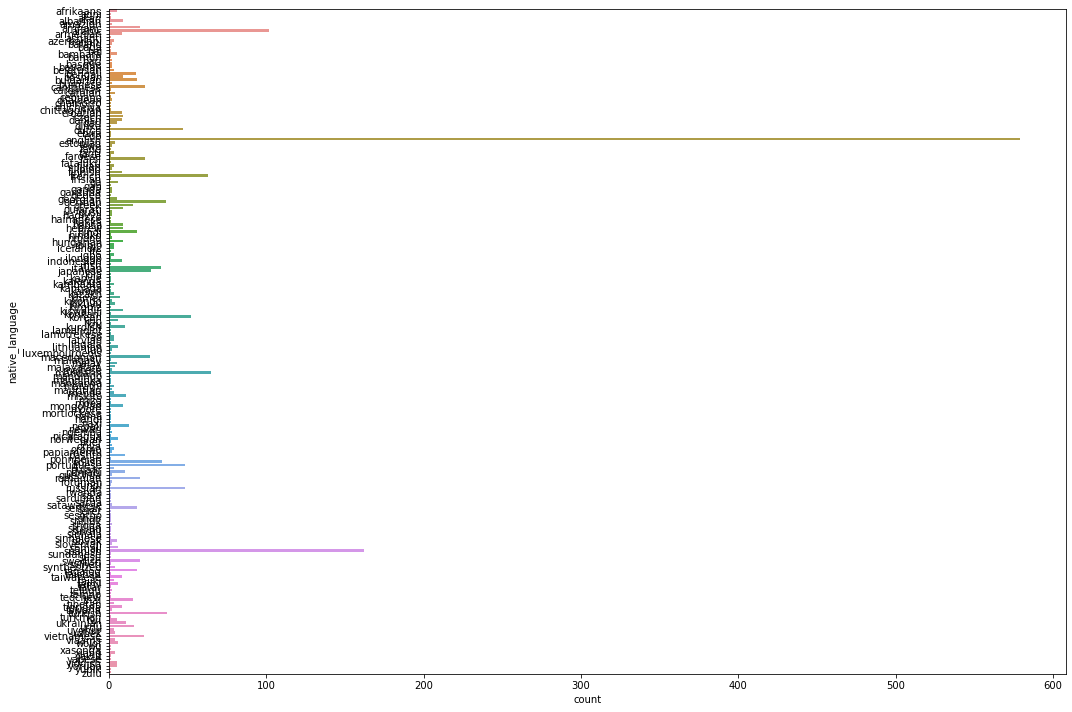

In [25]:
plt.figure(figsize=(15, 10))
sns.countplot(data=sel_df, y='native_language')

# Visualize Sound
- lets visualize the sound using pydub (basically show the sound)
- all of the sound read the same transcribe

In [37]:
wav_files = glob.glob('data/recordings/recordings/*.mp3')

In [40]:
with open('data/reading-passage.txt', 'r') as file:
    print(file.read())
    
AudioSegment.from_file(wav_files[0])

Please call Stella.  Ask her to bring these things with her from the store:  Six spoons of fresh snow peas, five thick slabs of blue cheese, and maybe a snack for her brother Bob.  We also need a small plastic snake and a big toy frog for the kids.  She can scoop these things into three red bags, and we will go meet her Wednesday at the train station.



In [42]:
wav, sr = librosa.load('data/recordings/recordings/afrikaans1.mp3')

/home/superceed1/anaconda3/envs/py38torch17/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


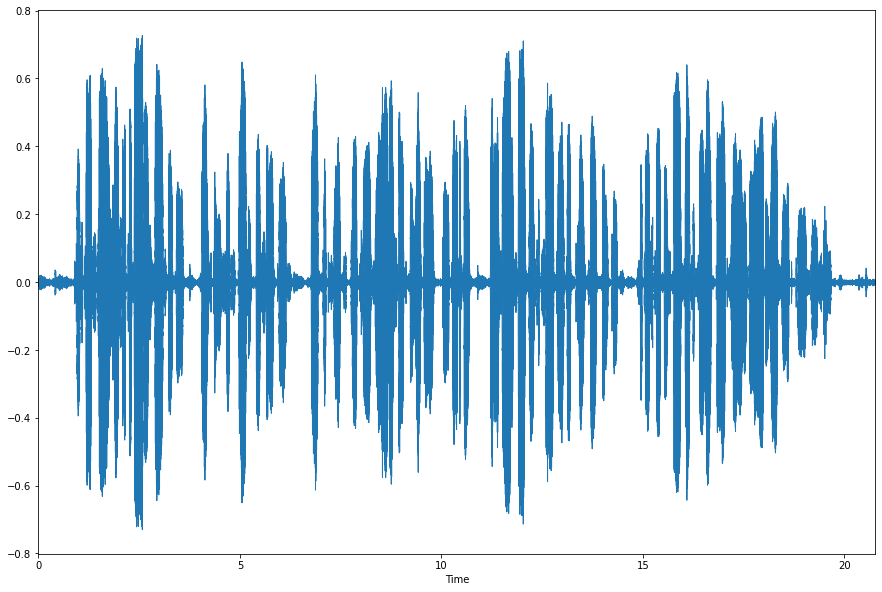

In [47]:
plt.figure(figsize=(15, 10))
librosa.display.waveplot(wav)

In [58]:
mel_spec = librosa.feature.melspectrogram(wav, sr)
mel_spec = librosa.power_to_db(mel_spec)

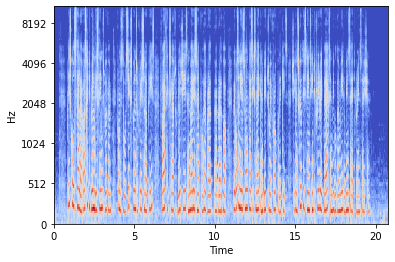

In [59]:
librosa.display.specshow(mel_spec, sr=sr, x_axis='time', y_axis='mel')

In [61]:
# Visualize mfcc - will be using this
mfcc = librosa.feature.mfcc(wav, sr=sr)

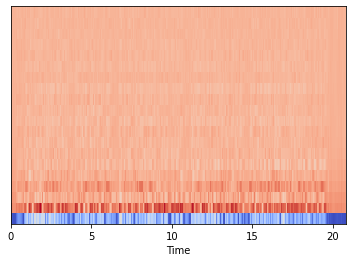

In [66]:
librosa.display.specshow(mfcc, x_axis='time')